In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
categories=['Food','Travel','Fashion','Fitness','Music','Culture','Family','Health']

In [3]:
data={'Date':pd.date_range('2023-01-01',periods=500),
      'Category':[random.choice(categories) for _ in range(500)],
      'Likes': np.random.randint(0,100000,size=500)}

In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,Date,Category,Likes
0,2023-01-01,Food,5166
1,2023-01-02,Health,47390
2,2023-01-03,Fashion,77063
3,2023-01-04,Family,1454
4,2023-01-05,Health,8356


In [6]:
df.describe()

,Likes
count,500.000000
mean,49642.772000
std,28851.863153
min,92.000000
25%,25796.000000
50%,49009.500000
75%,74007.500000
max,99682.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


In [8]:
df['Category'].value_counts()

Food       72
Music      70
Health     67
Fitness    65
Family     63
Travel     59
Fashion    58
Culture    46
Name: Category, dtype: int64

In [9]:
# dealing with null values if there are any in Category section.
# removing the rows which has a null value for category.
df.dropna(subset=['Category'],inplace=True)

In [10]:
# dealing with null values if there are any in likes section.
# replacing the null values with an integer value close to mean.
x=int(df['Likes'].mean())
df['Likes'].fillna(x,inplace=True)

In [11]:
# removing duplicate data
df.drop_duplicates()

,Date,Category,Likes
0,2023-01-01,Food,5166
1,2023-01-02,Health,47390
2,2023-01-03,Fashion,77063
3,2023-01-04,Family,1454
4,2023-01-05,Health,8356
...,...,...,...
495,2024-05-10,Travel,78017
496,2024-05-11,Family,96710
497,2024-05-12,Travel,98808
498,2024-05-13,Music,51028


In [12]:
# converting the dataframe field to a datetime format to appropriately display the data.
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.head()

,Date,Category,Likes
0,2023-01-01,Food,5166
1,2023-01-02,Health,47390
2,2023-01-03,Fashion,77063
3,2023-01-04,Family,1454
4,2023-01-05,Health,8356


In [14]:
df.astype({'Likes':'int32'}).dtypes

Date        datetime64[ns]
Category            object
Likes                int32
dtype: object

<AxesSubplot:xlabel='Likes', ylabel='Count'>

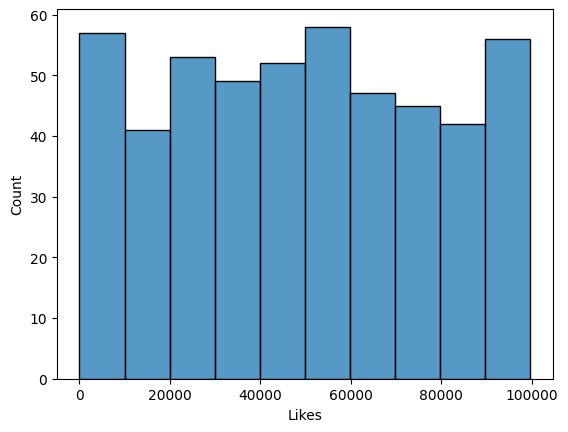

In [15]:
sns.histplot(data=df, x='Likes')

<AxesSubplot:xlabel='Category', ylabel='Likes'>

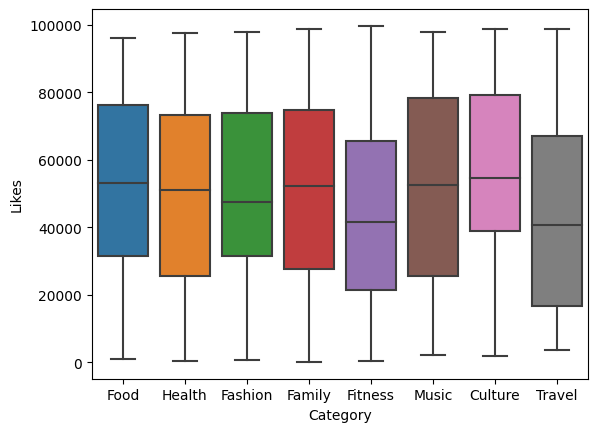

In [16]:
sns.boxplot(data=df, x='Category',y='Likes')

In [17]:
print(df['Likes'].mean())

49642.772


In [18]:
print(df.groupby('Category').mean())

                 Likes
Category              
Culture   55787.630435
Family    50406.095238
Fashion   50470.758621
Fitness   44941.923077
Food      52540.069444
Health    49212.074627
Music     51200.700000
Travel    43506.762712
